#### Dune Sales Data
# Exploratory Data Analysis

In [1]:
# Installing missingno library
# !pip install missingno


In [2]:
# Installing matplotlib library
# ! pip install matplotlib

In [1]:
import missingno as msno
from collections import Counter

In [2]:
# Importng the neccesary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Reading the dataset
df= pd.read_csv(r"C:\Users\DELL PRO\Downloads\Dune Sales Data.csv")
df

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price
0,19-Feb-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.00,109.00
1,20-Feb-16,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.50,28.50
2,27-Feb-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,3.67,5.00
3,12-Mar-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,2.0,87.50,116.50
4,12-Mar-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,35.00,41.67
...,...,...,...,...,...,...,...,...,...,...,...,...
34862,7-Feb-16,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,2.0,1160.00,985.50
34863,13-Mar-15,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,1.0,2049.00,1583.00
34864,5-Apr-15,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,3.0,683.00,560.67
34865,30-Aug-15,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,1.0,2320.00,1568.00


In [11]:
# Identifying the dataset features
df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price'],
      dtype='object')

In [4]:
# Data summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34867 entries, 0 to 34866
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              34866 non-null  object 
 1   Customer          34866 non-null  object 
 2   Sales Person      34866 non-null  object 
 3   Customer_Age      34867 non-null  int64  
 4   Customer_Gender   34866 non-null  object 
 5   State             34866 non-null  object 
 6   Product_Category  34866 non-null  object 
 7   Sub_Category      34866 non-null  object 
 8   Payment Option    34866 non-null  object 
 9   Quantity          34866 non-null  float64
 10  Unit_Cost         34866 non-null  float64
 11  Unit_Price        34866 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 3.2+ MB


In [13]:
# Identifying the missing data points
df.isnull().sum()

Date                1
Customer            1
Sales Person        1
Customer_Age        0
Customer_Gender     1
State               1
Product_Category    1
Sub_Category        1
Payment Option      1
Quantity            1
Unit_Cost           1
Unit_Price          1
dtype: int64

In [15]:
# Identifying and dropping missing data and 
df[df.isnull().any(axis = 1)]

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price
34866,NaN,NaN,NaN,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

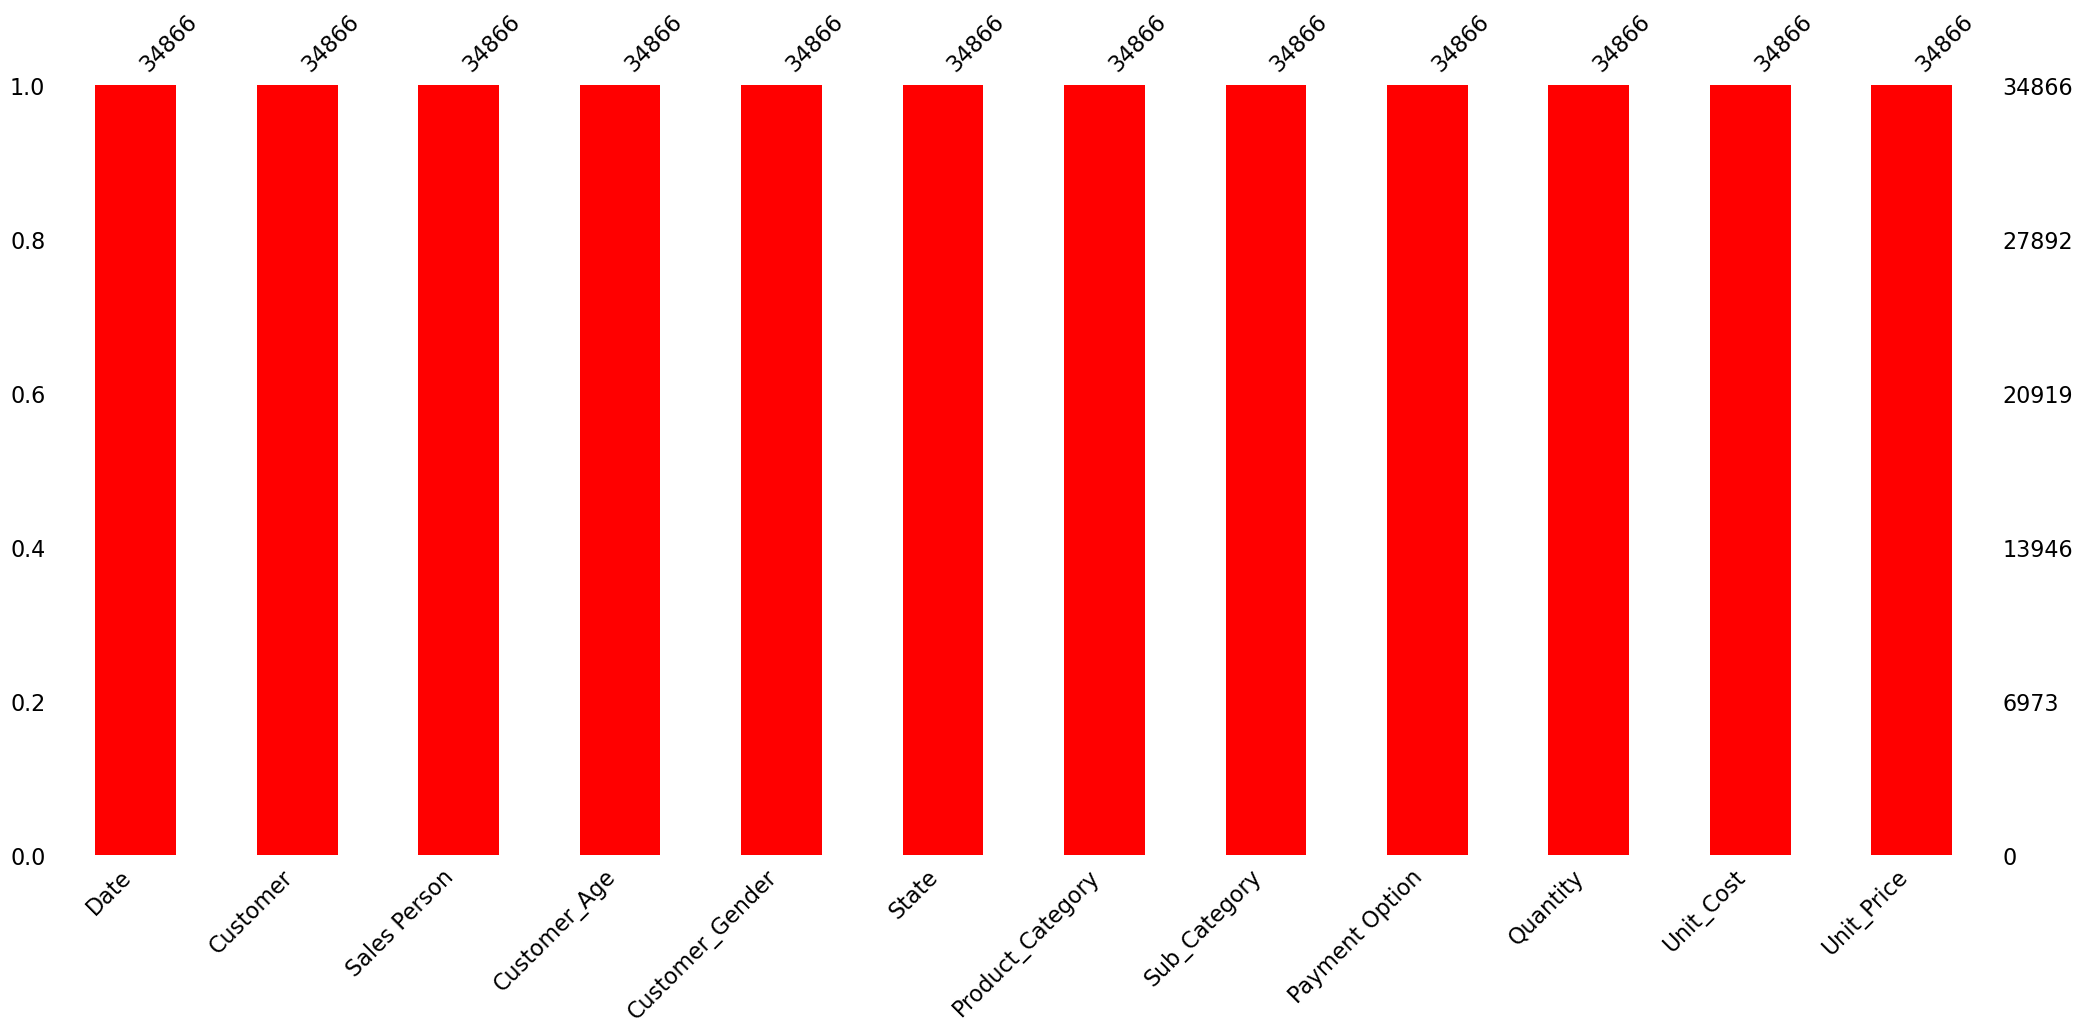

In [20]:
# Vitualizing the null data
msno.bar(df, color = 'r')

In [25]:
# Removing missing data
df.dropna(inplace = True)


In [26]:
df.isnull().sum()

Date                0
Customer            0
Sales Person        0
Customer_Age        0
Customer_Gender     0
State               0
Product_Category    0
Sub_Category        0
Payment Option      0
Quantity            0
Unit_Cost           0
Unit_Price          0
dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34866 entries, 0 to 34865
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              34866 non-null  object 
 1   Customer          34866 non-null  object 
 2   Sales Person      34866 non-null  object 
 3   Customer_Age      34866 non-null  int64  
 4   Customer_Gender   34866 non-null  object 
 5   State             34866 non-null  object 
 6   Product_Category  34866 non-null  object 
 7   Sub_Category      34866 non-null  object 
 8   Payment Option    34866 non-null  object 
 9   Quantity          34866 non-null  float64
 10  Unit_Cost         34866 non-null  float64
 11  Unit_Price        34866 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 3.5+ MB


In [28]:
# Statistical distribution of numerical features
df.describe()

,Customer_Age,Quantity,Unit_Cost,Unit_Price
count,34866.000000,34866.000000,34866.000000,34866.000000
mean,36.382636,2.002524,349.880567,389.232473
std,11.112969,0.813936,490.015846,525.319097
min,17.000000,1.000000,0.670000,0.670000
25%,28.000000,1.000000,45.000000,53.670000
50%,35.000000,2.000000,150.000000,179.000000
75%,44.000000,3.000000,455.000000,521.000000
max,87.000000,3.000000,3240.000000,5082.000000


In [29]:
# Statistical distribution of categorical features
df.describe(include = 'object')

,Date,Customer,Sales Person,Customer_Gender,State,Product_Category,Sub_Category,Payment Option
count,34866,34866,34866,34866,34866,34866,34866,34866
unique,576,4,7,2,36,3,17,3
top,1-Mar-16,Low,Remota,F,Lagos,Accessories,Keyboard,Cash
freq,196,13041,6667,17439,10332,22534,11112,15911


In [20]:
# Identifying and correcting customer type 'Hign' to'High
df.loc[df['Customer'] == 'Hign', 'Customer']= 'High'

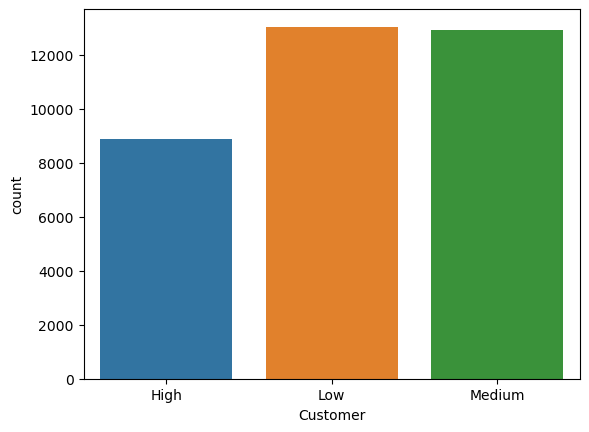

In [54]:
sns.countplot(x = df['Customer'], data = df);

#### Observation
Low customer and Medium categories are approximately having higher counts of profit for the company 

In [45]:
df.columns
    

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price'],
      dtype='object')

In [11]:
# Creating cost price, selling price  and profit features
df['Cost Price'] = df['Quantity'] * df['Unit_Cost']
df['Selling Price'] = df['Quantity'] * df['Unit_Price']
df['Profit'] = df['Selling Price'] - df['Cost Price']
    
    

In [72]:
# Verfying features creation
df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price', 'Cost Price', 'Selling Price',
       'Profit'],
      dtype='object')

In [19]:
# Creating age_group for Customer Age
def age_group(age):
    if age <= 25:
        return "Young"
    elif age <= 45:
        return "Young Adult"
    elif age <= 65:
        return "Adult"
    else:
        return "Old"

# Appling the function operation to customer Age
df['Age_Group'] = df['Customer_Age'].apply(age_group)

In [20]:
df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price', 'Cost Price', 'Selling Price',
       'Profit', 'Age_Group'],
      dtype='object')

In [83]:
df.head()

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price,Cost Price,Selling Price,Profit,Age_Group
0,19-Feb-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.0,109.0,80.0,109.0,29.0,Young Adult
1,20-Feb-16,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.5,28.5,49.0,57.0,8.0,Young Adult


In [86]:
# Identifying loss in profit column
df[df['Profit'] < 0]

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price,Cost Price,Selling Price,Profit,Age_Group
35,15-Dec-15,High,Segun,29,F,Abia,Accessories,Wrist Watch,Online,2.0,280.0,269.00,560.0,538.00,-22.00,Young Adult
41,20-Dec-15,High,Segun,29,F,Abia,Accessories,Wrist Watch,Online,1.0,630.0,624.00,630.0,624.00,-6.00,Young Adult
50,13-Aug-15,High,Segun,18,M,Lagos,Phones,IPhone,Online,1.0,2295.0,2242.00,2295.0,2242.00,-53.00,Young
52,20-Oct-15,High,Segun,18,M,Lagos,Phones,IPhone,Online,2.0,1160.0,1005.00,2320.0,2010.00,-310.00,Young
56,24-Jul-15,High,Segun,19,M,Abia,Phones,IPhone,Online,1.0,2320.0,2160.00,2320.0,2160.00,-160.00,Young
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34861,22-Mar-15,High,Kenny,37,M,Kebbi,Phones,IPhone,Online,1.0,2049.0,1487.00,2049.0,1487.00,-562.00,Young Adult
34862,7-Feb-16,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,2.0,1160.0,985.50,2320.0,1971.00,-349.00,Young Adult
34863,13-Mar-15,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,1.0,2049.0,1583.00,2049.0,1583.00,-466.00,Young Adult
34864,5-Apr-15,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,3.0,683.0,560.67,2049.0,1682.01,-366.99,Young Adult


In [17]:
# Creating profit/Loss feature
def profit_Loss(num):
    if num < 0:
        return "Loss"
    elif num == 0:
        return "Neutral"
    else:
        return "Profit"
    
# Applying the function profit_Loss to Profit feature
df['Profit/Loss'] = df['Profit'].apply(profit_Loss) 

In [89]:
df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price', 'Cost Price', 'Selling Price',
       'Profit', 'Age_Group', 'Profit/Loss'],
      dtype='object')

In [25]:
# Datetime Analysis
# Converting date object column to pandas datetime feature
df['Date'] = pd.to_datetime(df['Date'])




In [94]:
# Checking the data information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34866 entries, 0 to 34865
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              34866 non-null  datetime64[ns]
 1   Customer          34866 non-null  object        
 2   Sales Person      34866 non-null  object        
 3   Customer_Age      34866 non-null  int64         
 4   Customer_Gender   34866 non-null  object        
 5   State             34866 non-null  object        
 6   Product_Category  34866 non-null  object        
 7   Sub_Category      34866 non-null  object        
 8   Payment Option    34866 non-null  object        
 9   Quantity          34866 non-null  float64       
 10  Unit_Cost         34866 non-null  float64       
 11  Unit_Price        34866 non-null  float64       
 12  Cost Price        34866 non-null  float64       
 13  Selling Price     34866 non-null  float64       
 14  Profit            3486

In [26]:
# Converting features for year,month,quarter,month_name
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter
df['Month_Name'] = df['Date'].dt.month_name

In [99]:
df.head()

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,...,Unit_Price,Cost Price,Selling Price,Profit,Age_Group,Profit/Loss,Year,Month,Quarter,Month_Name
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,...,109.00,80.00,109.00,29.00,Young Adult,Profit,2016,2,1,<bound method PandasDelegate._add_delegate_acc...
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,...,28.50,49.00,57.00,8.00,Young Adult,Profit,2016,2,1,<bound method PandasDelegate._add_delegate_acc...
2,2016-02-27,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,...,5.00,11.01,15.00,3.99,Young Adult,Profit,2016,2,1,<bound method PandasDelegate._add_delegate_acc...
3,2016-03-12,High,Segun,29,F,Abia,Accessories,Keyboard,Online,2.0,...,116.50,175.00,233.00,58.00,Young Adult,Profit,2016,3,1,<bound method PandasDelegate._add_delegate_acc...
4,2016-03-12,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,...,41.67,105.00,125.01,20.01,Young Adult,Profit,2016,3,1,<bound method PandasDelegate._add_delegate_acc...


### Univariate Analysis of Statistical Distribution of Categorical Features

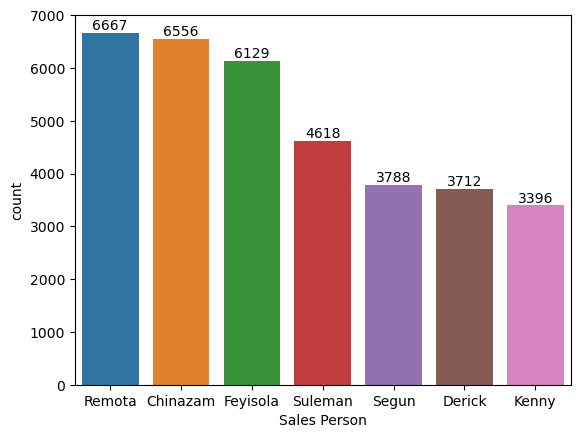

In [103]:
# Transaction by Sales Person
ax = sns.countplot(x = df['Sales Person'], data = df, order = df['Sales Person'].value_counts(ascending= False).index)
values = df['Sales Person'].value_counts(ascending= False).values
ax.bar_label(container = ax.containers[0], labels = values);

#### Observation
REmota has the highest counts of sales person for transaction with 6667 while Kenny has the lowest counts  of 3396.

In [16]:
df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price'],
      dtype='object')

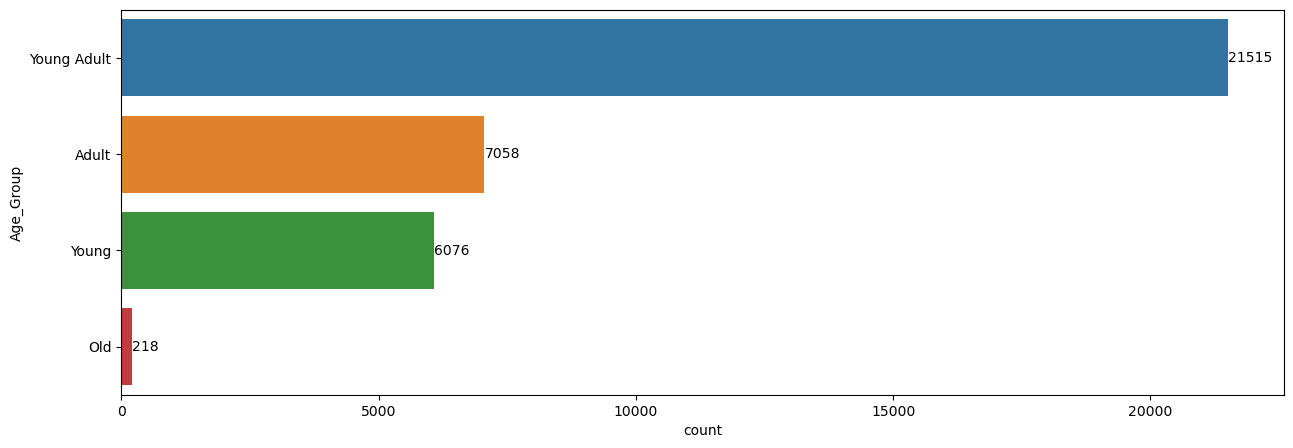

In [21]:
# Age_Group Transaction
plt.figure(figsize=(15,5))
ax = sns.countplot(y = df['Age_Group'], data = df, order = df['Age_Group'].value_counts(ascending= False).index)
values = df['Age_Group'].value_counts(ascending= False).values
ax.bar_label(container = ax.containers[0], labels = values);

#### Observation
Young Adult has the highest counts in age group for transaction with21515 while old has the lowest counts of 218

In [108]:
df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price', 'Cost Price', 'Selling Price',
       'Profit', 'Age_Group', 'Profit/Loss', 'Year', 'Month', 'Quarter',
       'Month_Name'],
      dtype='object')

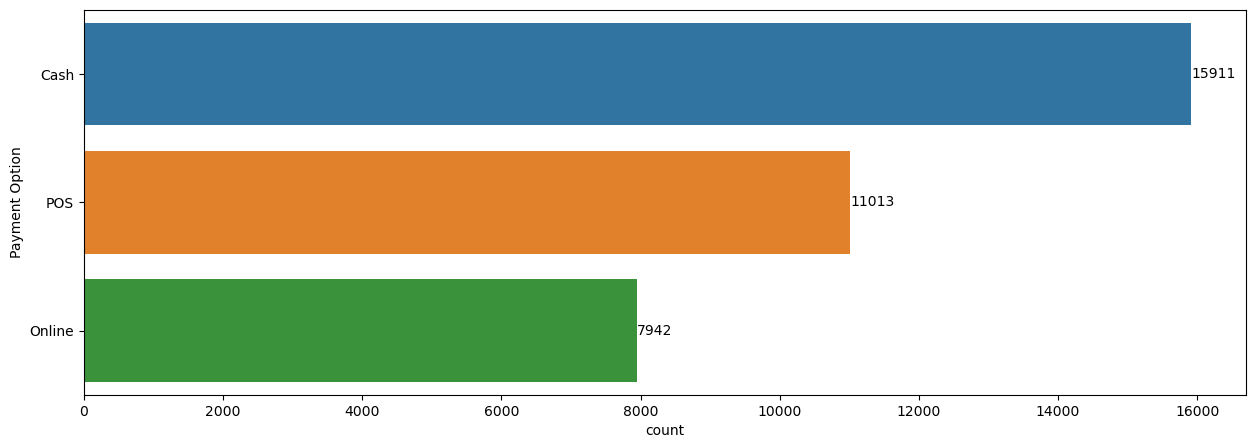

In [110]:
# Payment Option Transaction
plt.figure(figsize=(15,5))
ax = sns.countplot(y = df['Payment Option'], data = df, order = df['Payment Option'].value_counts(ascending= False).index)
values = df['Payment Option'].value_counts(ascending= False).values
ax.bar_label(container = ax.containers[0], labels = values);

#### Obsevation
Cash has the highest counts in payment option for transaction with 15911 while online has the lowest counts of 7942

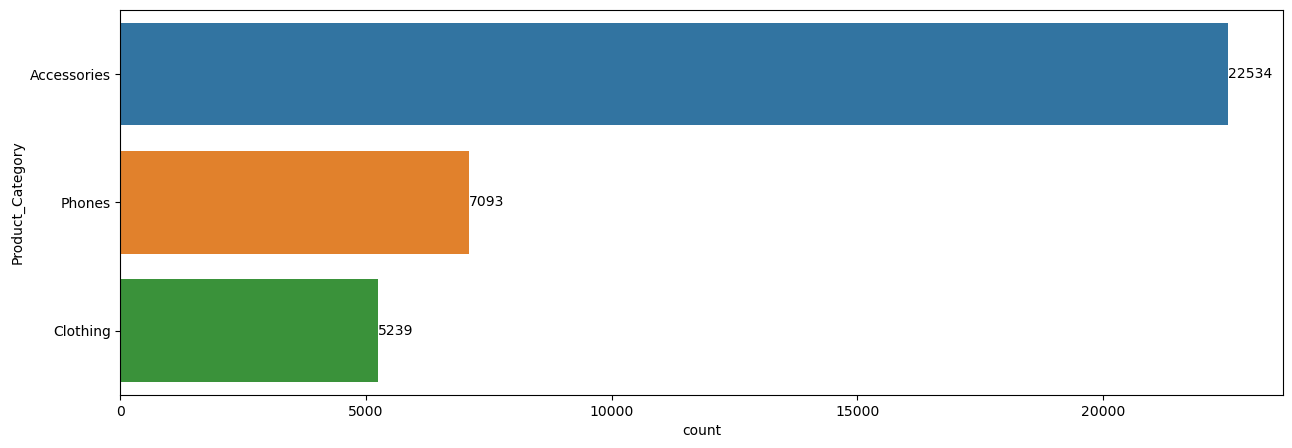

In [111]:
# Product Category Transaction
plt.figure(figsize=(15,5))
ax = sns.countplot(y = df['Product_Category'], data = df, order = df['Product_Category'].value_counts(ascending= False).index)
values = df['Product_Category'].value_counts(ascending= False).values
ax.bar_label(container = ax.containers[0], labels = values);

#### Observation
Accesories has the highest counts in product category for transaction with 22534 while clothing has the lowest counts of 5239

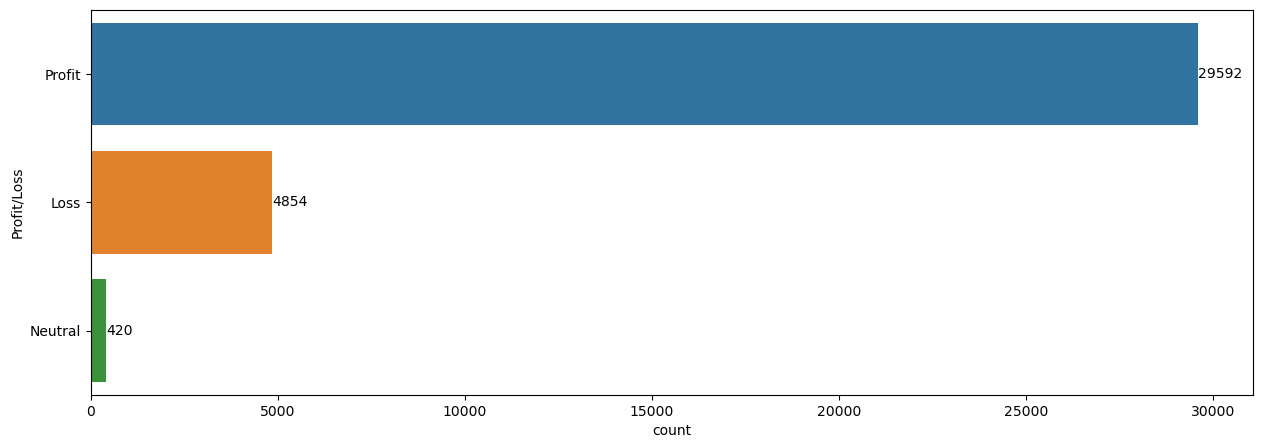

In [123]:
# Profit/Loss Transaction
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.countplot(y = df['Profit/Loss'], data = df, order = df['Profit/Loss'].value_counts(ascending= False).index)
values = df['Profit/Loss'].value_counts(ascending= False).values
ax.bar_label(container = ax.containers[0], labels = values);

Observation:
There is profit of 29592 dollar, loss of 4854 dollar and 420 dollar with neither profit nor loss in the entire transaction.

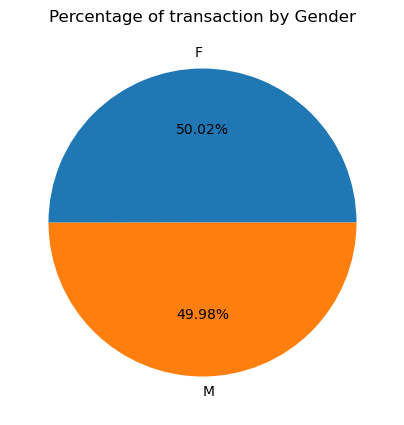

In [119]:
fig, ax = plt.subplots(figsize=(5,5))
count = Counter(df['Customer_Gender'])
ax.pie(count.values(), labels=count.keys(), autopct= lambda p:f'{p:.2f}%')
ax.set_title('Percentage of transaction by Gender')
plt.show();

#### Observation:
Both female and male have approximately the same percentage for the transaction

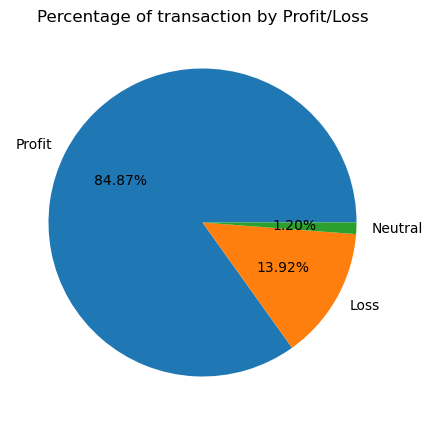

In [121]:
fig, ax = plt.subplots(figsize=(5,5))
count = Counter(df['Profit/Loss'])
ax.pie(count.values(), labels=count.keys(), autopct= lambda p:f'{p:.2f}%')
ax.set_title('Percentage of transaction by Profit/Loss')
plt.show();

#### Observation:
Transaction is profitted with 84.87%, with loss of 13.92% and 1.20% of transcation without loss and profit

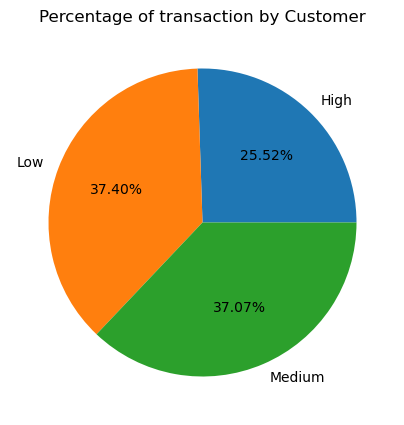

In [156]:
fig, ax = plt.subplots(figsize=(5,5))
count = Counter(df['Customer'])
ax.pie(count.values(), labels=count.keys(), autopct= lambda p:f'{p:.2f}%')
ax.set_title('Percentage of transaction by Customer')
plt.show();


Observation:
Medium and low customers categories are having approximate higher percentages of 37.40% and 37.07% than high customer of 25.52%

In [124]:
df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price', 'Cost Price', 'Selling Price',
       'Profit', 'Age_Group', 'Profit/Loss', 'Year', 'Month', 'Quarter',
       'Month_Name'],
      dtype='object')

<Axes: xlabel='State', ylabel='count'>

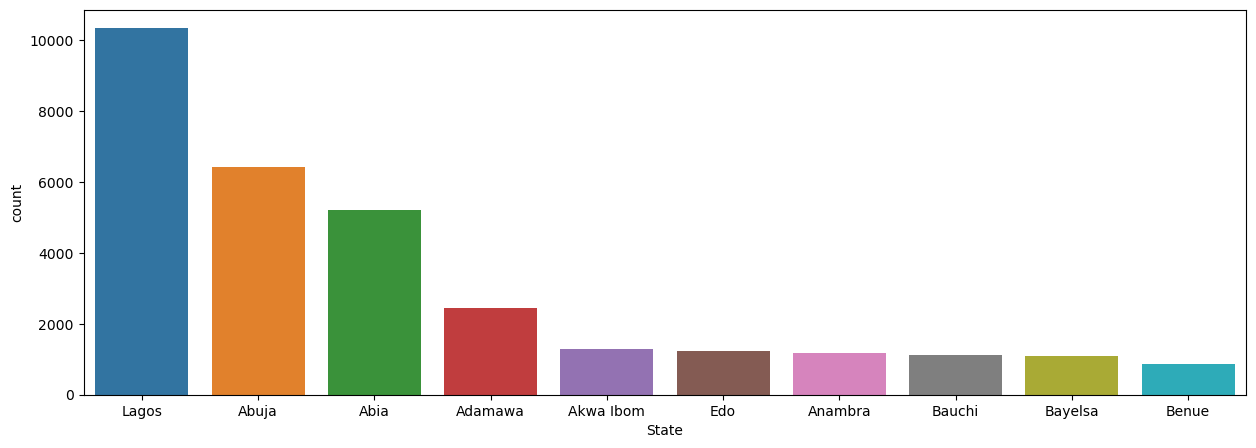

In [163]:
plt.figure(figsize=(15,5))
top_10_state = df['State'].value_counts(ascending= False).head(10) 
sns.countplot(x = df['State'], data = df, order = top_10_state.index) 


#### Observation
Lagos has the highest counts of of tracsaction in state feature while Benue is the tenth state in counts of transaction

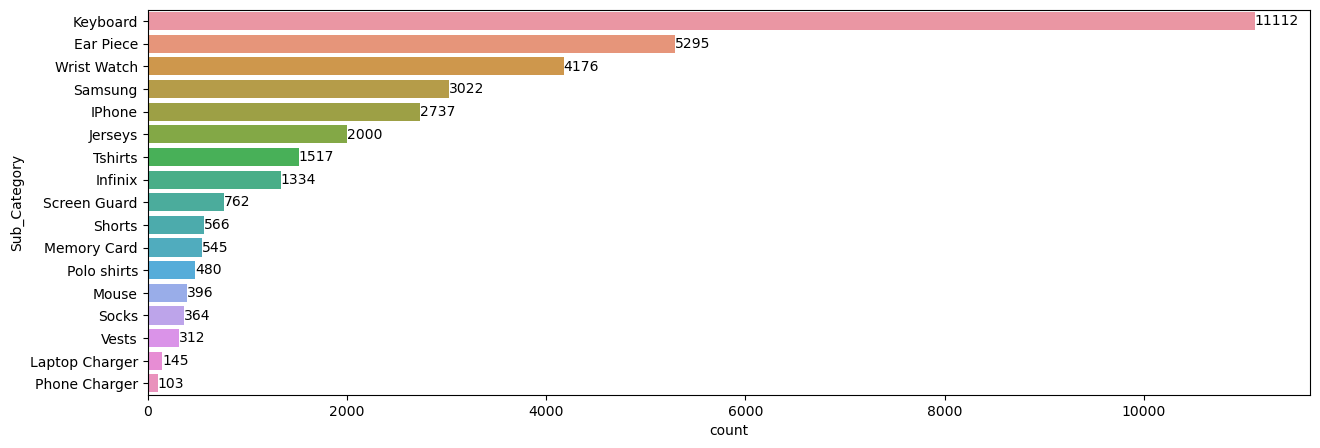

In [126]:
plt.figure(figsize=(15,5))
ax = sns.countplot(y = df['Sub_Category'], data = df, order = df['Sub_Category'].value_counts(ascending= False).index)
values = df['Sub_Category'].value_counts(ascending= False).values
ax.bar_label(container = ax.containers[0], labels = values);

#### Observation:
Keyboard is most demanded sub category product with the counts of 11112 and phone charger with the laest demand of 103 in the transaction

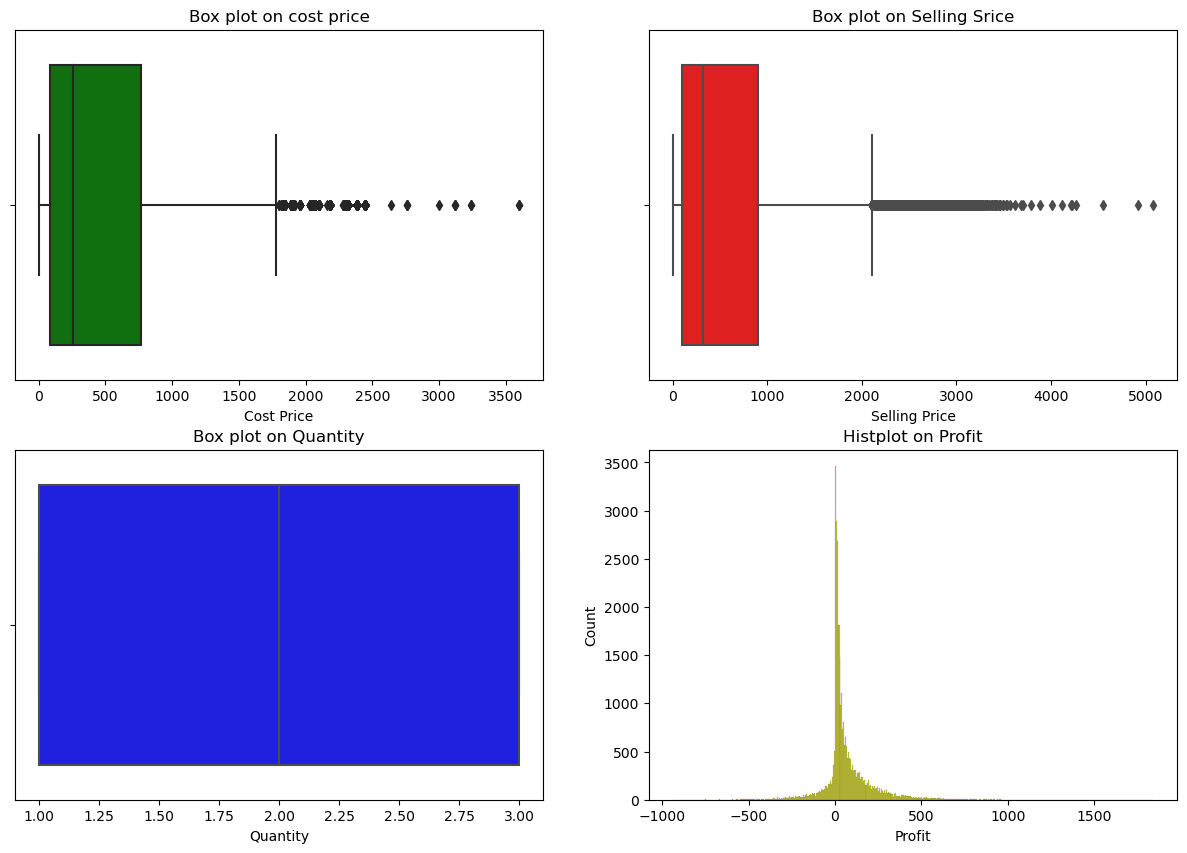

In [152]:
fig, axs = plt.subplots(nrows=2,ncols=2 ,figsize= (15,10))
sns.boxplot(x= df['Cost Price'], data= df, ax= axs[0,0], color = 'g')
axs[0,0].set_title('Box plot on cost price')


sns.boxplot(x= df['Selling Price'], data= df, ax= axs[0,1], color = 'r')
axs[0,1].set_title('Box plot on Selling Srice')


sns.boxplot(x= df['Quantity'], data= df, ax= axs[1,0], color = 'b')
axs[1,0].set_title('Box plot on Quantity')


sns.histplot(x= df['Profit'], data= df, ax= axs[1,1], color = 'y')
axs[1,1].set_title('Histplot on Profit');


#### Observation:
Cost price, selling price and quantity features have outliers. Profit feature is right skewed with outliers from 500 dollar

In [164]:
df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price', 'Cost Price', 'Selling Price',
       'Profit', 'Age_Group', 'Profit/Loss', 'Year', 'Month', 'Quarter',
       'Month_Name'],
      dtype='object')

### Bivariate Analysis

### Relationship of categorical features with dependent variables(Profit)

Text(0.5, 1.0, 'Barplot on profit by Sub_Category')

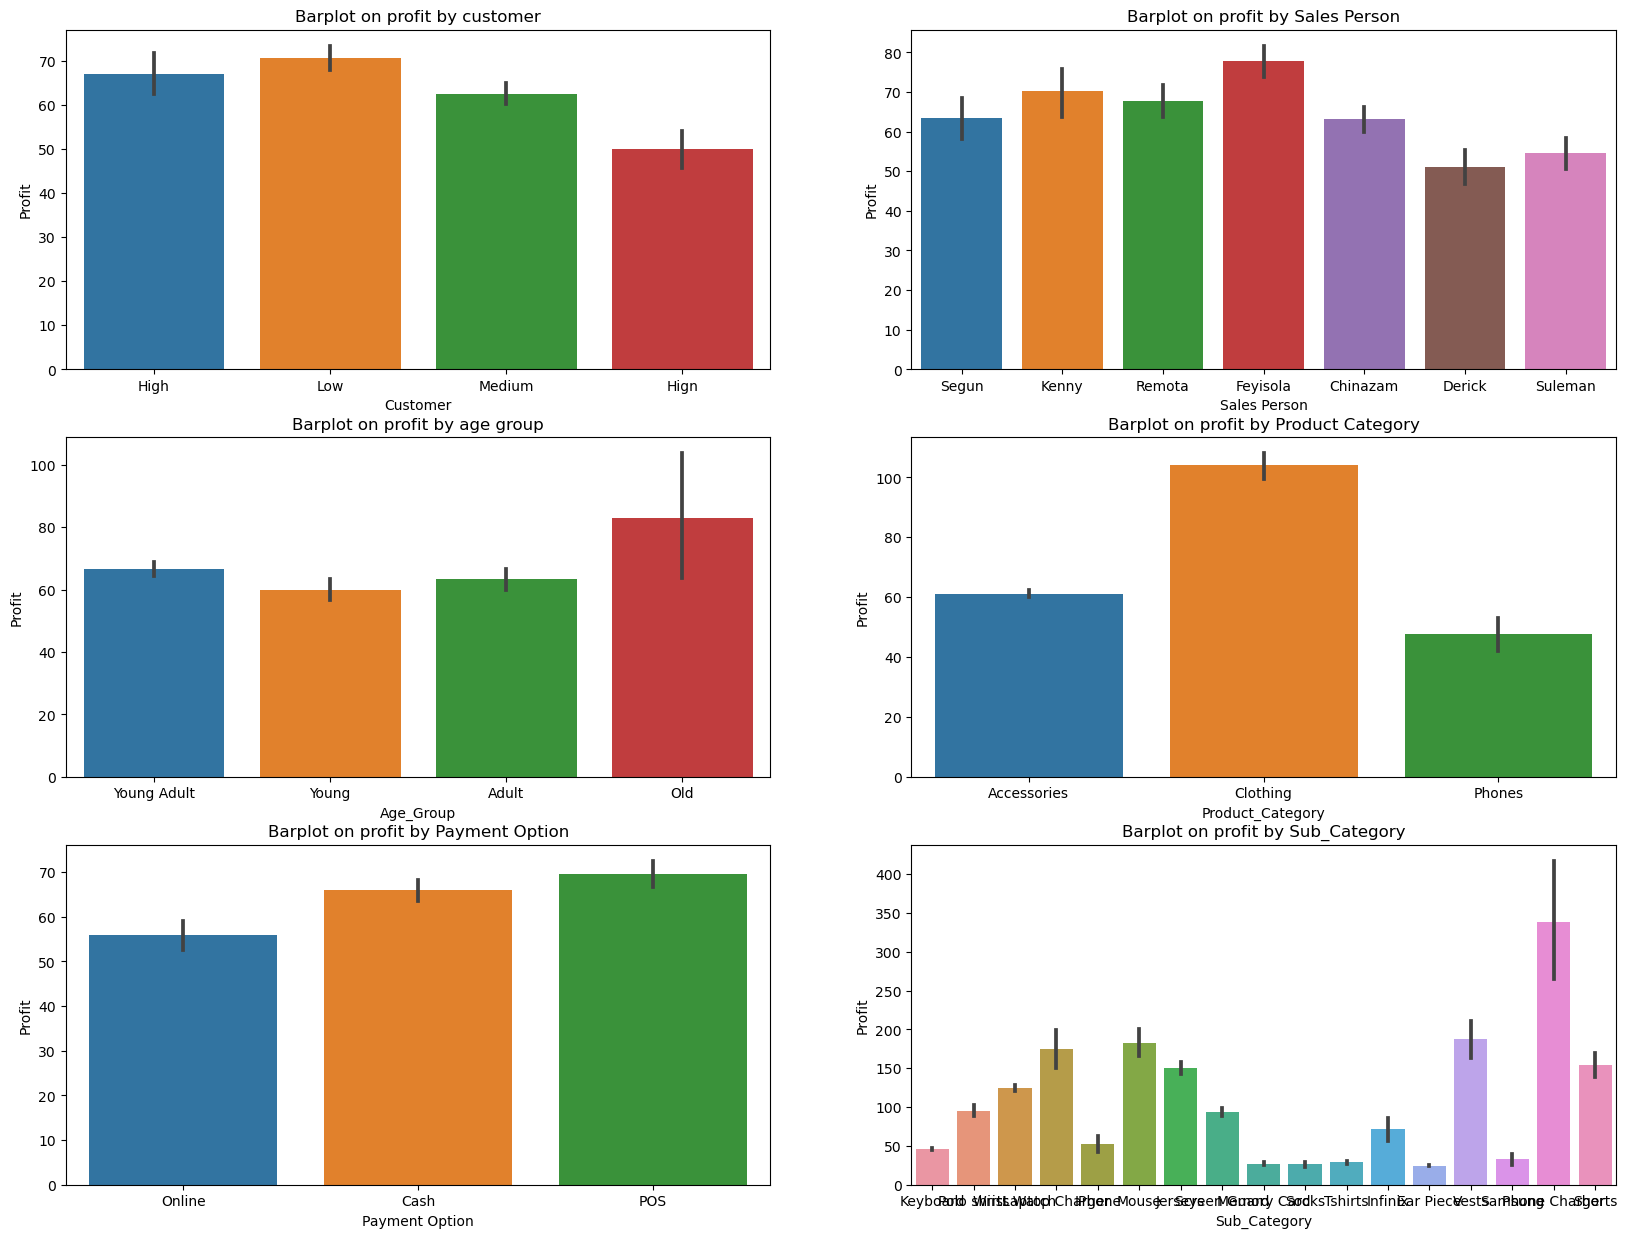

In [24]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 2, figsize=(20, 15))
sns.barplot(x = df['Customer'], data= df, y= 'Profit', ax= axs[0,0])
axs[0,0].set_title('Barplot on profit by customer')

sns.barplot(x = df['Sales Person'], data= df, y= 'Profit', ax= axs[0,1])
axs[0,1].set_title('Barplot on profit by Sales Person')

sns.barplot(x = df['Age_Group'], data= df, y= 'Profit', ax= axs[1,0])
axs[1,0].set_title('Barplot on profit by age group')

sns.barplot(x = df['Product_Category'], data= df, y= 'Profit', ax= axs[1,1])
axs[1,1].set_title('Barplot on profit by Product Category')

sns.barplot(x = df['Payment Option'], data= df, y= 'Profit', ax= axs[2,0])
axs[2,0].set_title('Barplot on profit by Payment Option')

sns.barplot(x = df['Sub_Category'], data= df, y= 'Profit', ax= axs[2,1])
axs[2,1].set_title('Barplot on profit by Sub_Category')








#### OBSERVATION:
POS generates the highest profit for in payment option, Old brings the highest profit in age group feature, Clothing product category attracts the highest profit, Feyisola is the sales person that brought the highest profit, Low category brings the highest profit in customer category. 

### Relationship of numerical features with dependent variables(Profit)

Text(0.5, 1.0, 'Boxplot on Profit by Customer Age')

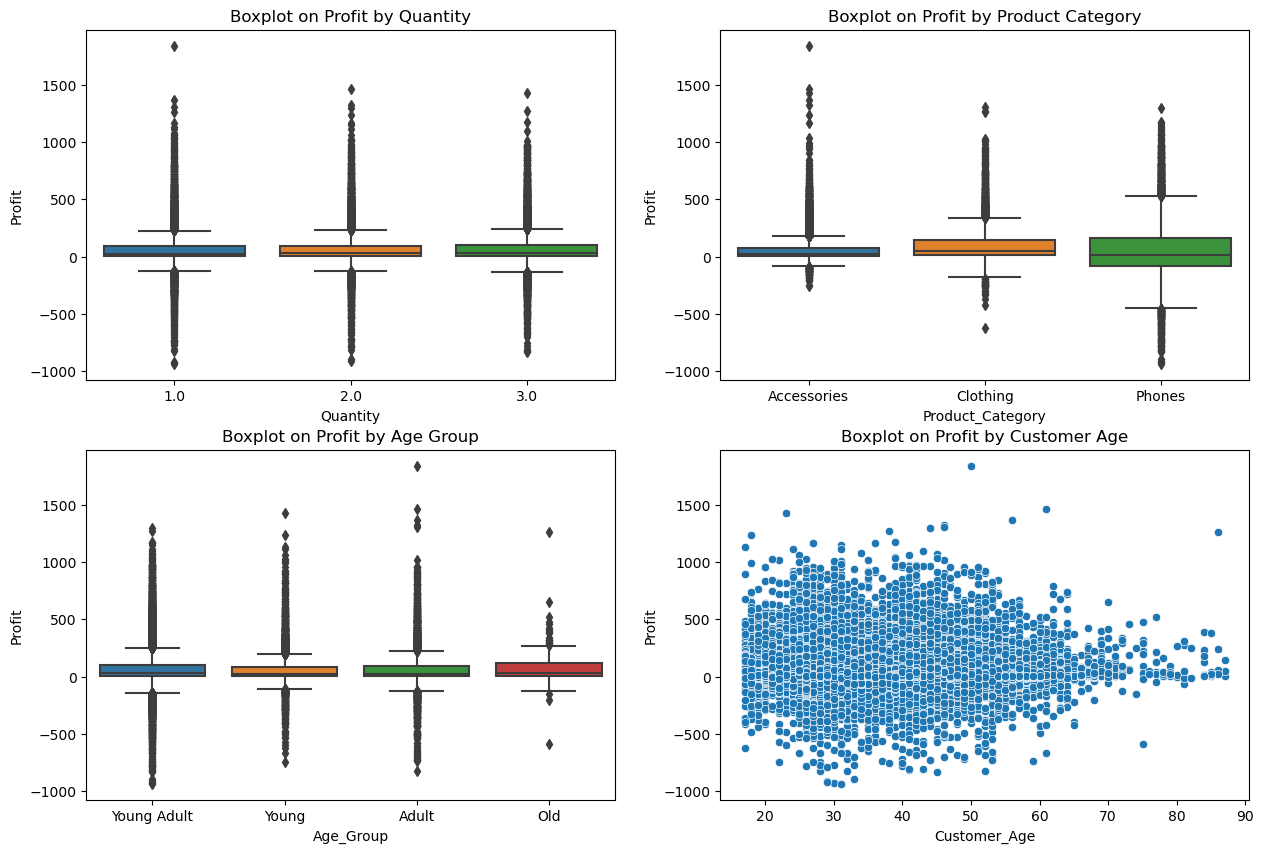

In [29]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
sns.boxplot(x= df['Quantity'], y= df['Profit'], data= df, ax= axs[0,0])
axs[0,0].set_title('Boxplot on Profit by Quantity')

sns.boxplot(x= df['Product_Category'], y= df['Profit'], data= df, ax= axs[0,1])
axs[0,1].set_title('Boxplot on Profit by Product Category')

sns.boxplot(x= df['Age_Group'], y= df['Profit'], data= df, ax= axs[1,0])
axs[1,0].set_title('Boxplot on Profit by Age Group')

sns.scatterplot(x= df['Customer_Age'], y= df['Profit'], data= df, ax= axs[1,1])
axs[1,1].set_title('Boxplot on Profit by Customer Age')



#### OBSERVATION
All the numerical features have outliers


In [31]:
df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price', 'Cost Price', 'Selling Price',
       'Profit', 'Age_Group'],
      dtype='object')

### MULTIVARIATE ANALYSIS

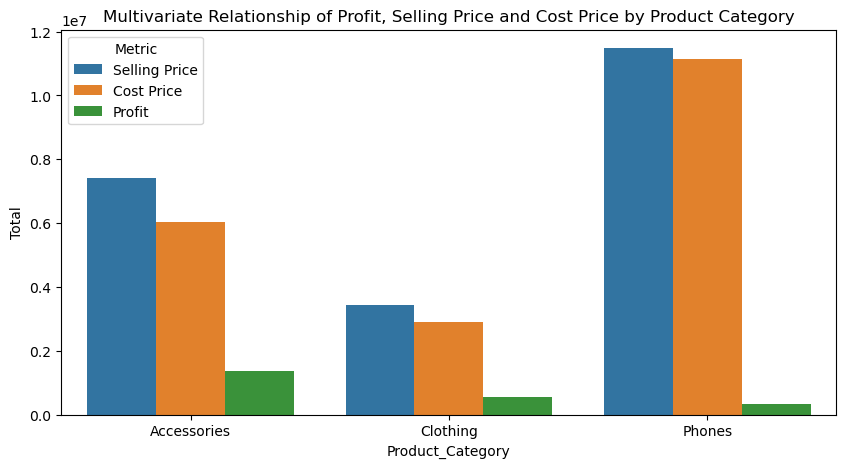

In [27]:
fig, ax = plt.subplots(figsize=(10, 5))
prod_cat= df.groupby('Product_Category')[['Selling Price', 'Cost Price', 'Profit']].sum().reset_index()
prod_cat1= pd.melt(prod_cat, id_vars= 'Product_Category', var_name= 'Metric', value_name= 'Total')
sns.barplot(data= prod_cat1, x= 'Product_Category', y= 'Total', hue= 'Metric')
ax.set_title('Multivariate Relationship of Profit, Selling Price and Cost Price by Product Category');

### OBSERVATION
Accessories generate the highest profit, followed by clothing and phones generate the least profit. All the products categories are mostly influenced by selling price.

### RECOMMENDATION
Accessories should be the most concern on product offering and marketing campaign strategy have to be heightened for other products.

In [56]:
df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price', 'Cost Price', 'Selling Price',
       'Profit', 'Age_Group'],
      dtype='object')

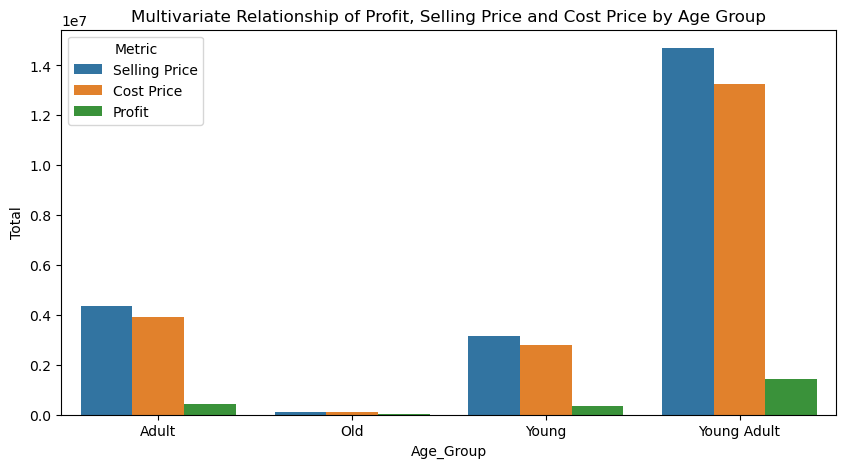

In [28]:
fig, ax = plt.subplots(figsize=(10, 5))
prod_cat= df.groupby('Age_Group')[['Selling Price', 'Cost Price', 'Profit']].sum().reset_index()
prod_cat1= pd.melt(prod_cat, id_vars= 'Age_Group', var_name= 'Metric', value_name= 'Total')
sns.barplot(data= prod_cat1, x= 'Age_Group', y= 'Total', hue= 'Metric')
ax.set_title('Multivariate Relationship of Profit, Selling Price and Cost Price by Age Group');

### OBSERVATION
Young adult generate the highest profit, followed by Adult and Young while old generate the least profit. 

### RECOMMENDATION
Young adult should be the most concern on product offering and marketing campaign strategy have to be heightened for other age group.

In [59]:
df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price', 'Cost Price', 'Selling Price',
       'Profit', 'Age_Group'],
      dtype='object')

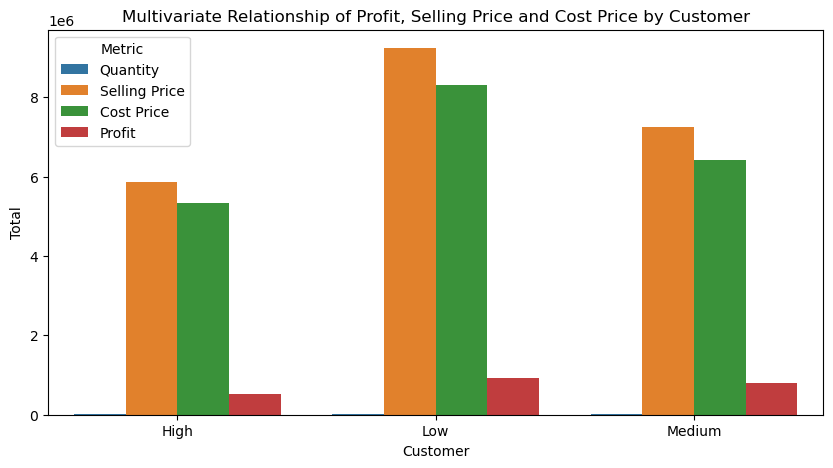

In [21]:
fig, ax = plt.subplots(figsize=(10, 5))
prod_cat= df.groupby('Customer')[['Quantity', 'Selling Price', 'Cost Price', 'Profit']].sum().reset_index()
prod_cat1= pd.melt(prod_cat, id_vars= 'Customer', var_name= 'Metric', value_name= 'Total')
sns.barplot(data= prod_cat1, x= 'Customer', y= 'Total', hue= 'Metric')
ax.set_title('Multivariate Relationship of Profit, Selling Price and Cost Price by Customer');

### OBSERVATION
Low customers generate the highest profit, followed by Medium and High generate the least profit. 

### RECOMMENDATION
Low and Medium categories should be the most concern on product offering and marketing campaign strategy have to be heightened for other customer category.

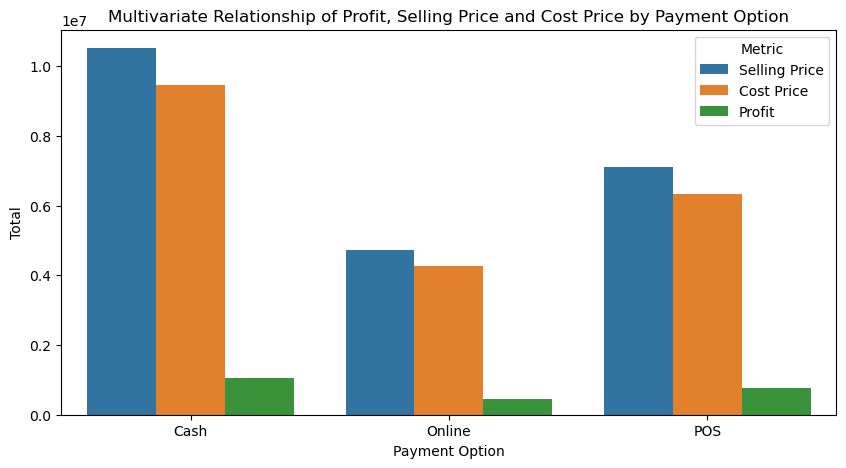

In [15]:
fig, ax = plt.subplots(figsize=(10, 5))
prod_cat= df.groupby('Payment Option')[['Selling Price', 'Cost Price', 'Profit']].sum().reset_index()
prod_cat1= pd.melt(prod_cat, id_vars= 'Payment Option', var_name= 'Metric', value_name= 'Total')
sns.barplot(data= prod_cat1, x= 'Payment Option', y= 'Total', hue= 'Metric')
ax.set_title('Multivariate Relationship of Profit, Selling Price and Cost Price by Payment Option');

### OBSERVATION
Cash payment option generate the highest profit, followed by POS and Online generate the least profit. 

### RECOMMENDATION
Cash and POS should be the most concern on product offering for payment and marketing campaign strategy have to be heightened for other products payment option.

In [4]:
import matplotlib.pyplot as plt 

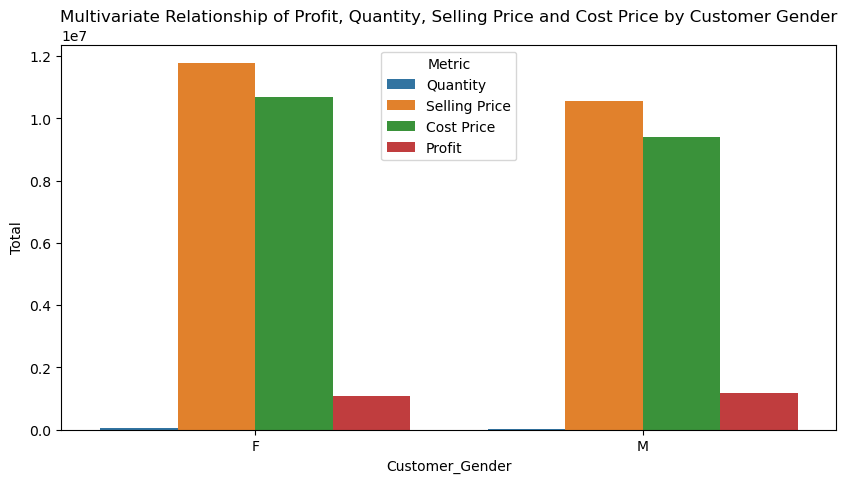

In [14]:
fig, ax = plt.subplots(figsize=(10, 5))
prod_cat= df.groupby('Customer_Gender')[['Quantity', 'Selling Price', 'Cost Price', 'Profit']].sum().reset_index()
prod_cat1= pd.melt(prod_cat, id_vars= 'Customer_Gender', var_name= 'Metric', value_name= 'Total')
sns.barplot(data= prod_cat1, x= 'Customer_Gender', y= 'Total', hue= 'Metric')
ax.set_title('Multivariate Relationship of Profit, Quantity, Selling Price and Cost Price by Customer Gender');

### OBSERVATION
Both female and male genders generate approximately the same profit, 

### RECOMMENDATION
Both genders should be the most concern on product offering and marketing campaign strategy 

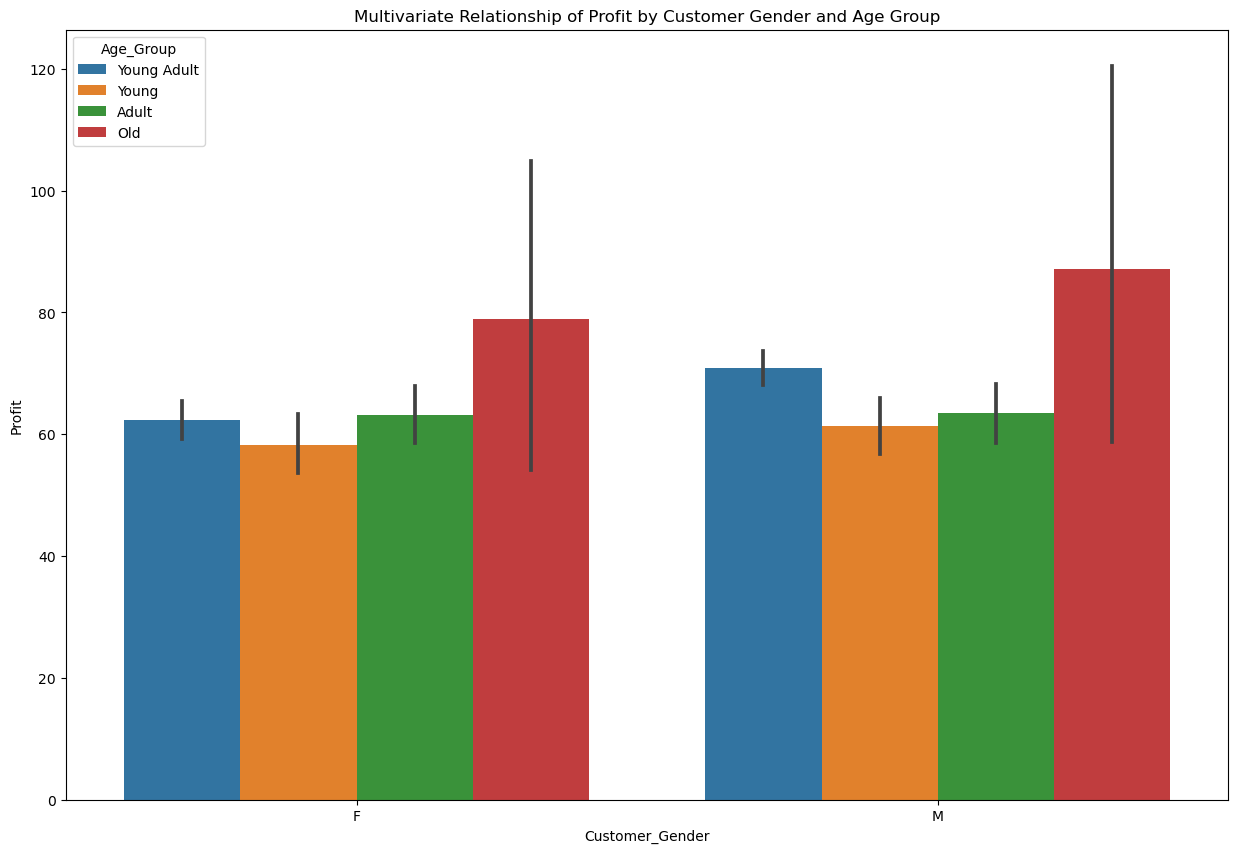

In [66]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(data= df, x= 'Customer_Gender', y= 'Profit', hue= 'Age_Group')
ax.set_title('Multivariate Relationship of Profit by Customer Gender and Age Group');

#### OBSERVATION
Old male and female genders have the strongest influence on profit compared with other age group categories.

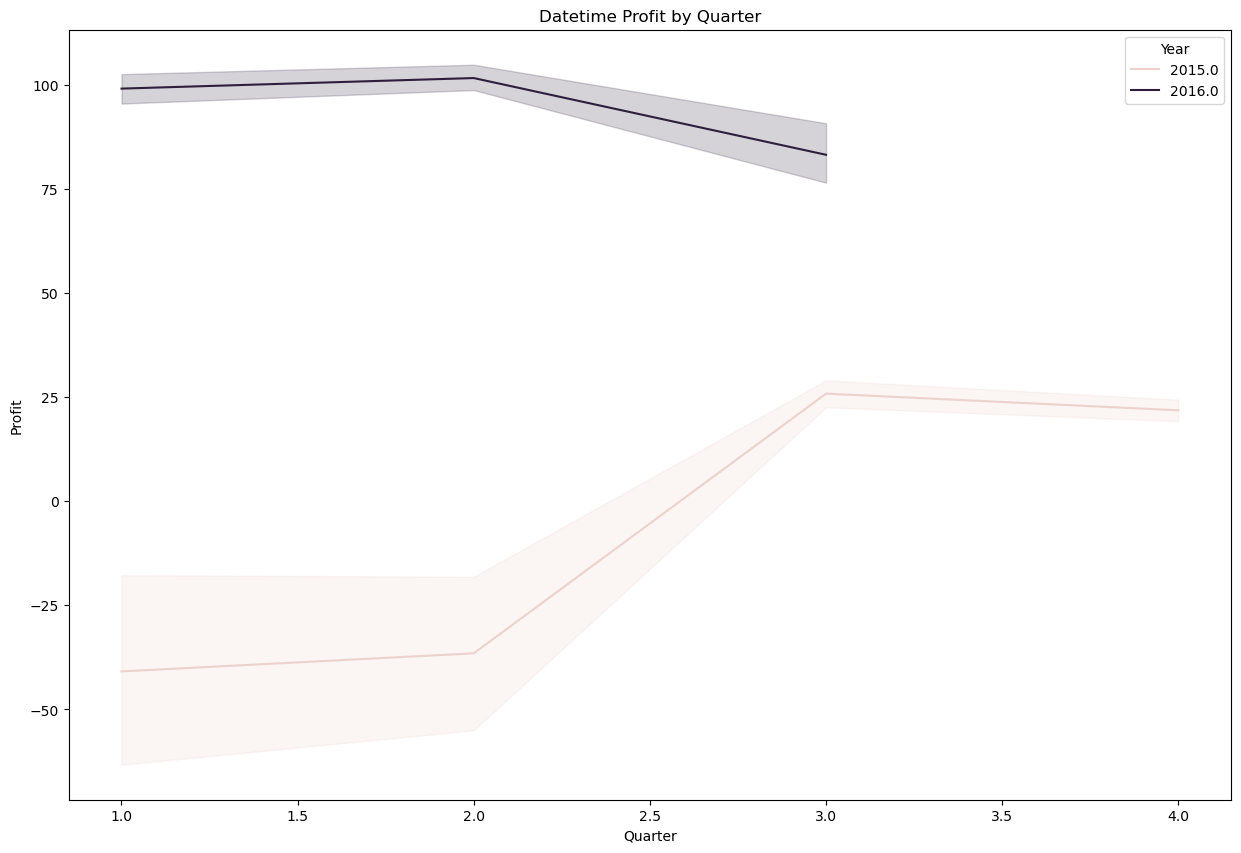

In [34]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.lineplot(data= df, x= 'Quarter', y= 'Profit', hue= 'Year')
ax.set_title('Datetime Profit by Quarter');

#### OBSERVATION
. Profit was maintained in the first quarter of year 2016 but dropped in second quarter

. Profit increased in second quarter of year 2015 and slightly dropped in third quarter

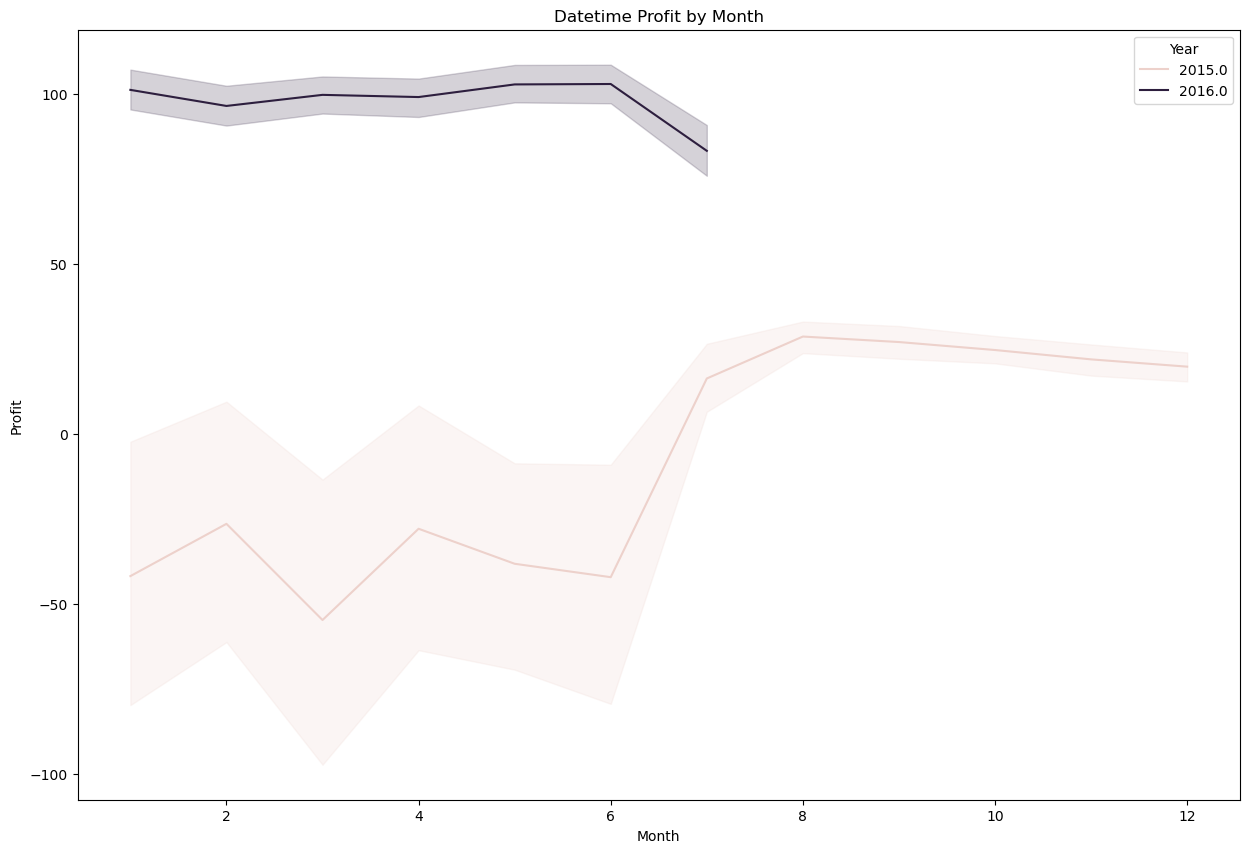

In [36]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.lineplot(data= df, x= 'Month', y= 'Profit', hue= 'Year')
ax.set_title('Datetime Profit by Month');

#### OBSERVATION
. Profit was maintained till sixth month of year 2016 when it dropped.

. Profit is progessively increasing till eighteth month of year 2015 when slightly dropped to twelveth month